In [ ]:
import requests
import json

# Define your API key and the endpoint URL
api_key = '555a630757264dfe91011283370def9a'  # Replace with your NewsAPI key
url = f'https://newsapi.org/v2/top-headlines?category=business&language=en&apiKey={api_key}'

# Send a request to the NewsAPI endpoint
response = requests.get(url)
data = response.json()

# Check if the retrieval was successful
if response.status_code == 200:
    print("News retrieved successfully.")
    # Example: print the title of the first article
    if data.get('articles'):
        print("Sample Title:", data['articles'][0]['title'])
else:
    print("Failed to retrieve news:", data.get('message'))

# For further processing, you may want to store the list of articles.
articles = data.get('articles', [])


News retrieved successfully.
Sample Title: Delta CEO says Trump's trade war is hurting bookings as airline axes 2025 flight growth plans - CNBC


In [ ]:
import re

def clean_text(text):
    """
    Remove unwanted characters and HTML tags,
    and fix spacing issues.
    """
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', ' ', text)
    # Remove non-alphabetic characters (keep punctuation as needed)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Example usage:
raw_text = "Breaking news: <p>Markets surge!</p> #finance2025"
cleaned_text = clean_text(raw_text)
print("Cleaned Text:", cleaned_text)


Cleaned Text: Breaking news Markets surge finance


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    """
    Tokenize text into individual words.
    """
    tokens = word_tokenize(text)
    return tokens

# Tokenizing the cleaned text
tokens = tokenize_text(cleaned_text)
print("Tokens:", tokens)


Tokens: ['Breaking', 'news', 'Markets', 'surge', 'finance']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    """
    Remove stopwords from token list.
    """
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

# Remove stopwords from tokens
filtered_tokens = remove_stopwords(tokens)
print("Tokens after Stopword Removal:", filtered_tokens)


Tokens after Stopword Removal: ['Breaking', 'news', 'Markets', 'surge', 'finance']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def normalize_tokens(tokens):
    """
    Normalize tokens by converting to lowercase.
    """
    return [token.lower() for token in tokens]

# Normalize token list
normalized_tokens = normalize_tokens(filtered_tokens)
print("Normalized Tokens:", normalized_tokens)


Normalized Tokens: ['breaking', 'news', 'markets', 'surge', 'finance']


In [ ]:
from nltk.stem import PorterStemmer

def stem_tokens(tokens):
    """
    Stem tokens using the Porter Stemmer.
    """
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

stemmed_tokens = stem_tokens(normalized_tokens)
print("Stemmed Tokens:", stemmed_tokens)


Stemmed Tokens: ['break', 'news', 'market', 'surg', 'financ']


In [ ]:
# Make sure to install spaCy and download the English model (if not already installed)
# !pip install spacy
# !python -m spacy download en_core_web_sm

import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    """
    Lemmatize text using spaCy.
    """
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_punct and not token.is_space]

lemmatized_tokens = lemmatize_text(" ".join(normalized_tokens))
print("Lemmatized Tokens:", lemmatized_tokens)


Lemmatized Tokens: ['break', 'news', 'market', 'surge', 'finance']


In [ ]:
from nltk.util import ngrams

def generate_ngrams(tokens, n=2):
    """
    Generate n-grams from token list.
    """
    return list(ngrams(tokens, n))

# Generate bi-grams (2-grams)
bigrams = generate_ngrams(normalized_tokens, 2)
print("Bigrams:", bigrams)


Bigrams: [('breaking', 'news'), ('news', 'markets'), ('markets', 'surge'), ('surge', 'finance')]


In [ ]:
def pos_tagging(text):
    """
    Perform POS tagging using spaCy.
    """
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# POS tagging on the cleaned text
pos_tags = pos_tagging(" ".join(normalized_tokens))
print("POS Tags:", pos_tags)


POS Tags: [('breaking', 'VERB'), ('news', 'NOUN'), ('markets', 'NOUN'), ('surge', 'NOUN'), ('finance', 'NOUN')]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example corpus: a list of preprocessed article texts (here using cleaned_text for demonstration)
corpus = [cleaned_text, cleaned_text]  # In practice, use all retrieved articles

# Initialize the vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus)

print("TF-IDF Feature Names:", vectorizer.get_feature_names_out())
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)


TF-IDF Feature Names: ['breaking' 'finance' 'markets' 'news' 'surge']
TF-IDF Matrix Shape: (2, 5)


In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
import gensim.downloader as api

# Load a pre-trained Word2Vec model (this may take some time)
model = api.load("word2vec-google-news-300")  # Use the Google News vectors

# Example: Get embedding for a word (if present in the vocabulary)
word = "finance"
if word in model.key_to_index:
    embedding = model[word]
    print(f"Embedding shape for '{word}':", embedding.shape)
else:
    print(f"Word '{word}' not found in the model vocabulary.")


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Embedding shape for 'finance': (300,)


In [ ]:
!pip install numpy==1.24.0 gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.24.0 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.0 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.0 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.0 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.0 which is incompatible.
seaborn 0.13.2 requires numpy!=1.24.0,>=1.20, but you have numpy 1.24.0 wh

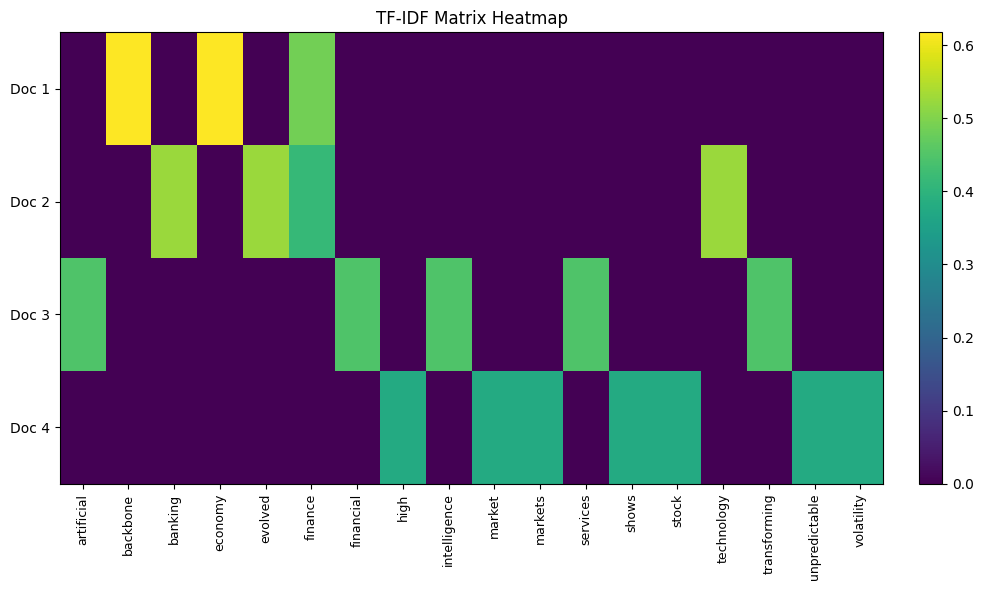

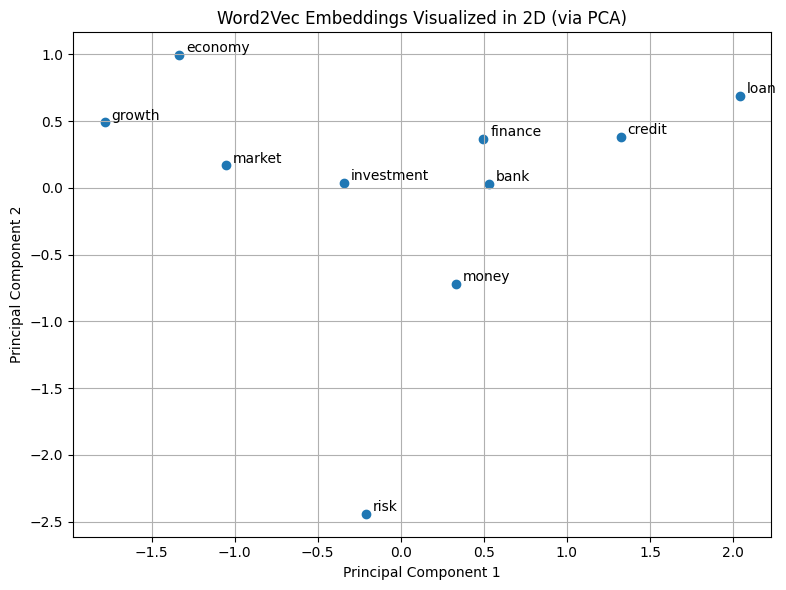

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import gensim.downloader as api

###############################
# Part 1: Visualizing TF-IDF
###############################

# Create a small corpus of example documents
corpus = [
    "Finance is the backbone of any economy",
    "Banking and finance have evolved with technology",
    "Artificial intelligence is transforming financial services",
    "The stock market shows high volatility in unpredictable markets"
]

# Initialize the TF-IDF vectorizer and fit on the corpus.
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus)

# Convert the sparse matrix to a dense array
tfidf_dense = tfidf_matrix.todense()

# Retrieve the feature names (words) corresponding to columns of tfidf_dense
feature_names = vectorizer.get_feature_names_out()

# Plot a heatmap for the TF-IDF matrix
fig, ax = plt.subplots(figsize=(10, 6))
heatmap = ax.imshow(tfidf_dense, aspect='auto', cmap='viridis')

# Set ticks to correspond to documents and words
ax.set_xticks(np.arange(len(feature_names)))
ax.set_yticks(np.arange(len(corpus)))

# Label the ticks with the feature names and document indices (or a short snippet)
ax.set_xticklabels(feature_names, rotation=90, fontsize=9)
ax.set_yticklabels([f"Doc {i+1}" for i in range(len(corpus))])

# Add title and color bar for reference
plt.title("TF-IDF Matrix Heatmap")
plt.colorbar(heatmap, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

##############################################
# Part 2: Visualizing Word2Vec using PCA (2D)
##############################################

# Load a pre-trained Word2Vec model (this may take a moment)
# Here we use the Google News vectors; you may choose alternatives if needed.
model = api.load("word2vec-google-news-300")

# Choose a set of words for visualization that are commonly present in financial texts.
words_to_plot = ["finance", "bank", "money", "economy", "market", "investment", "credit", "loan", "growth", "risk"]

# Filter out words that might not be present in the model vocabulary
words = [word for word in words_to_plot if word in model.key_to_index]

# Collect embeddings for these words.
embeddings = np.array([model[word] for word in words])

# Use PCA to reduce the embeddings from 300 dimensions to 2 dimensions.
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Create a scatter plot for the 2D embeddings.
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker='o')

# Annotate each point with the corresponding word.
for i, word in enumerate(words):
    plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=10,
                 xytext=(5, 2), textcoords='offset points')

plt.title("Word2Vec Embeddings Visualized in 2D (via PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()
